

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

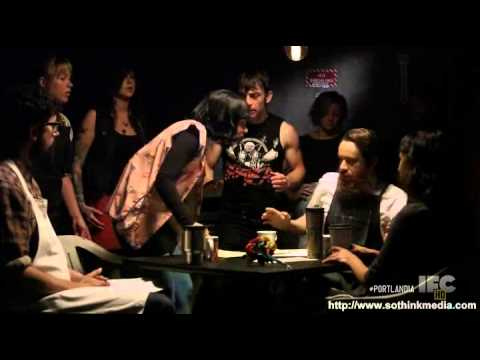

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Jml7NVYm8cs')

#0. Prepare

## 0.1 Get spacy

In [2]:
# Locally (or on colab) let's use en_core_web_lg 
!python -m spacy download en_core_web_md 
# Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!


     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     --------------------------------------- 0.0/42.8 MB 217.9 kB/s eta 0:03:17
     --------------------------------------- 0.0/42.8 MB 217.9 kB/s eta 0:03:17
     --------------------------------------- 0.0/42.8 MB 163.4 kB/s eta 0:04:22
     --------------------------------------- 0.1/42.8 MB 217.9 kB/s eta 0:03:17
     --------------------------------------- 0.1/42.8 MB 231.0 kB/s eta 0:03:05
     --------------------------------------- 0.1/42.8 MB 327.2 kB/s eta 0:02:11
     --------------------------------------- 0.1/42.8 MB 327.2 kB/s eta 0:02:11
     --------------------------------------- 0.1/42.8 MB 327.9 kB/s eta 0:02:11
     --------------------------------------- 0.2/42.8 MB 327.3 kB/s eta 0:02:11
     --------------------------------------- 0.2/42.8 MB 349.3 k

## 0.2 Restart runtime!

## 0.3 Install packages and do imports

In [3]:
# !pip install squarify

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

-----

## 0.4 Get data

In [2]:
url = "C:/Users/ISHMO_CT/Downloads/Bloomtech/Natural_proc/NLP/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
df['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

# 1 Practice: Clean, tokenize, remove stop words, lemmatize

## 1.0 Save Dates for later use (optional)
Each Review starts with a date, we could grab this date and add it as a new column on our dataframe if we want. This could be a valuable feature later on. This isn't absolutely necessary, but might be a good idea. Otherwise we might just be throwing away this useful information when we clean the text.



In [4]:
# grab date from the beginning of the review text
def get_date(text):
    return text.split(' ')[1]

df['date'] = df['full_review_text'].apply(get_date)

In [5]:
df

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,8/2/2015


In [6]:
# Another approach (we could also use regular expressions to grab the dates)
import re

def find_first_date(text):
  #return re.findall('\d+\/\d+\/\d+', text)[0]
  return re.findall(r'\d+/\d+/\d+', text)[0]

example_text = " 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? "

find_first_date(example_text)

'11/25/2016'

In [7]:
print(df['date'].iloc[0])
print(type(df['date'].iloc[0]))

11/25/2016
<class 'str'>


In [8]:
# turn date column strings into datetime objects
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

C:\Users\ISHMO_CT\AppData\Local\Temp\ipykernel_17476\3542298403.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)


In [9]:
print(type(df['date'][0]))
print(df['date'].iloc[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2016-11-25 00:00:00


In [10]:
dir(df['date'].iloc[0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_creso',
 '_date_repr',
 '_from_dt64',
 '_from_value_and_reso',
 '_repr_base',
 '_round',
 '_time_repr',
 '_value',
 'as_unit',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_mo

In [11]:
df['date'].iloc[0].day_name()

'Friday'

In [12]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03


In [13]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [14]:
df['star_rating'].value_counts()

star_rating
5.0 star rating     3780
4.0 star rating     2360
3.0 star rating      738
2.0 star rating      460
1.0 star rating      278
Name: count, dtype: int64

In [15]:
# looks like most dates are in late 2016
df['date'].value_counts()

date
2016-10-09    31
2016-09-18    30
2016-11-20    27
2016-11-02    27
2016-12-02    26
              ..
2012-03-06     1
2011-10-29     1
2012-03-14     1
2012-10-03     1
2013-01-09     1
Name: count, Length: 1592, dtype: int64

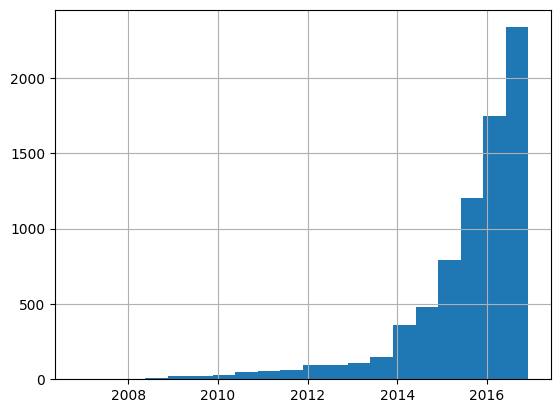

In [16]:
# histogram of review dates to see when most reviews were left
# just a little EDA
df['date'].hist(bins=20);

## 1.1 Clean Review Text (with Regular Expressions `regex`)
dataquest has a good [regex reference](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf
)

It looks like the reviews have the following characteristics

- Date at the beginning 
- Lots of punctuation 
- Use special characters like $ (as well as dollar amounts)
- Upper and lower case words

In [17]:
import re
# considering using regex to remove dates
# you can create and test regular expressions on this online regex editor: https://regex101.com/
    
def clean_data(text):
    """
    Accepts a single text document and performs several regex substitutions in order to clean the document. 
    
    Parameters
    ----------
    text: string or object 
    
    Returns
    -------
    text: string or object
    """
    
    # order of operations - apply the expression from top to bottom
    date_regex = r"\d+/\d+/\d+"
    punct_regex = r"[^0-9a-zA-Z\s]"
    special_chars_regex = r"[\&\%\\&\@+]"
    numerial_regex = r"\d+"

    # Replace any strings matching the above regex patterns with blank strings
    # (effectively removing them from the text)
    text = re.sub(date_regex, "", text)
    text = re.sub(punct_regex, "", text)
    text = re.sub(special_chars_regex, "", text)
    text = re.sub(numerial_regex, "", text)


    # match one or more whitespace chars
    white_space_regex = r"\s+"


    # replace one or more whitespace characters with a single white space char
    #    not a blank string!
    text = re.sub(white_space_regex, " ", text)


    # apply case normalization
    text = text.lower().strip()


    return text

In [18]:
df['cleaned_review'] = df['full_review_text'].apply(clean_data) 
df['cleaned_review'][0]

'checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas'

## 1.2. Tokenize the cleaned up reviews

In [19]:
tokens = []


for review in df['cleaned_review']:
    tokens.append(review.split(' '))

df['tokens'] = tokens

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coffee_shop_name  7616 non-null   object        
 1   full_review_text  7616 non-null   object        
 2   star_rating       7616 non-null   object        
 3   date              7616 non-null   datetime64[ns]
 4   cleaned_review    7616 non-null   object        
 5   tokens            7616 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 357.1+ KB


In [21]:
# with a for loop

# with a list comprehension
df['tokens'] = [review.split(' ') for review in df['cleaned_review']]
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor..."


### 1.3 Visualize the most common tokens
Below is the `count()` function that we used in the lecture.

In [22]:
from collections import Counter

def count(token_lists):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in_docs = Counter()

    total_docs = len(token_lists)

    for token_list in token_lists:
        # stores count of every appearance of a token 
        word_counts.update(token_list)
        
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in_docs.update(set(token_list))

    # build word count dataframe
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cumulative_fraction_of_total'] = wc['fraction_of_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

#### Summary of the descriptive token statistics 

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus 

`rank` Ranking of tokens by count 

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token. 

`appears_in_fraction_of_docs` Fraction of documents that token appears in 

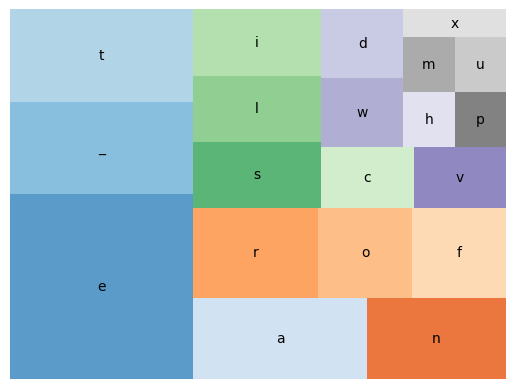

In [27]:
# visualize the 20 most common tokens with squarify
# Lots of stopwords!

#YOUR CODE HERE
import squarify
wc = count(df)

top20 = wc.head(20)

sizes = top20['count'].tolist()
labels = top20['word'].tolist()

colors = plt.cm.tab20c.colors

squarify.plot(sizes=sizes, label=labels, alpha=.8, color = colors)
plt.axis('off')
plt.show()


## 1.4 Clean, tokenize, remove stopwords, and lemmatize the reviews (with Spacy)

We can do all of the above with Spacy, but Spacy has the added benefit of making it easy to lemmatize tokens and remove stop words as well! Let's write a tokenize function with Spacy. 

In [28]:
import spacy
# import the large version of the pre-trained model
# depending on your computational resources/limitations, you might need to download and load in a smaller version of the model 
# see the spaCy docs: https://spacy.io/models/en
nlp = spacy.load('en_core_web_md')

## Remove stop word, punctuation and whitespace from each token

In [29]:
# this will take longer to run than a regex method because Spacy is doing a fair amount
# of extra stuff under the hood in creating the token attributes and everything.

def spacy_tokenizer(text):
    """
    Use the pre-trained model from Space to tokenize our text into lemmas 
    
    Notes
    -----
    Rememeber that the pre-trained spaCy model has a lot of built in flags for what kind of token each token is
    so we can use that functionality to create filters for stop words, white spaces, punctuation, and so on!
    
    See list of flags here: https://spacy.io/api/token#attributes
    
    Parameter
    ---------
    text: string
        Full text article/document that needs to be tokenized 
    """
    tokens = []
    doc = nlp(text)
    for token in doc:
        if not (token.is_stop or token.is_punct or token.is_space):
            tokens.append(token.lemma_)
    return tokens

In [30]:
df['full_review_text'][10]

' 10/22/2016 1 check-in Listed in Americano This is not your average cute study spot cafe.  Location/ Atmosphere: + Easy parking at the lot + Cute and classy interior decor! + Plenty of seats available (couches, swings, high chairs, etc) + Games like chess & tic tac toe available - No sign of outlets/ charging port on the walls - No wifi available - Not a study cafe unless you have all your papers printed out and don\'t need the internet  Service: o You order by yourself using an iPad up at the counter. + There are 3 iPads available making lines go by faster. + You can request them to text you upon your order being ready + When I told one of the baristas that the fork bin was empty, he kindly brought it over to our table along with a couple of knives! - There was no option to make drinks half sweetened/ less ice on the iPad screen :"(  Food/ Prices: + Highly recommend the Matcha Latte (it was thick and made to perfection!) + The chicken and waffle was well seasoned! + Aesthetically sup

In [32]:
# This code cell takes ~ 3 minutes on Google Colab
# %%time 
# YOUR CODE HERE
df['spacy_tokens'] = df['full_review_text'].apply(spacy_tokenizer)

In [33]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, 1, check, Love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, Austin, Ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, 1, check, list, Brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, 1, check, locate, Northcross, mall..."


##1.5 Visualize the Spacy Tokens

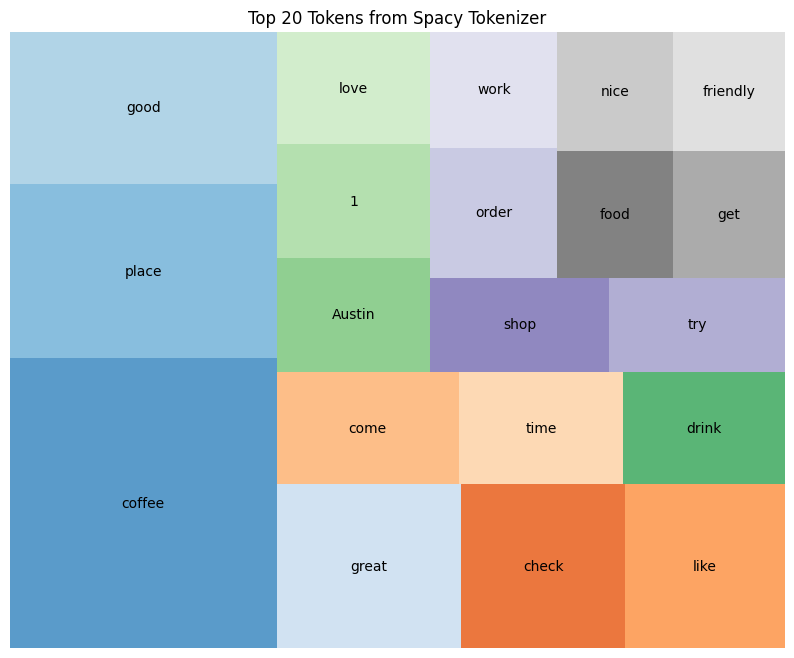

In [36]:
wc = count(df['spacy_tokens'])

wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(10, 8))
sizes = wc_top20['count'].tolist()
labels = wc_top20['word'].tolist()

colors = plt.cm.tab20c.colors

squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=colors)
plt.axis('off')
plt.title('Top 20 Tokens from Spacy Tokenizer')
plt.show()


# 2. Compare High and Low Coffeeshop reviews!

- We'll say that a "good" rating is 4 or 5 stars
- a "bad" rating is 3 stars or less

## 2.1 Create a numeric version of the star rating

In [37]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, 1, check, Love, love, love, atmos..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, Austin, Ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, 1, check, list, Brunch, spot, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, good, drink, nice, s..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, 1, check, locate, Northcross, mall..."


In [38]:
df['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

Let's write a `regex` to extract only the numerical value of the rating from this text string<br>
Reference: [Easiest way to remember Regular Expressions](https://towardsdatascience.com/easiest-way-to-remember-regular-expressions-regex-178ba518bebd)

In [46]:
df['stars'] = df['star_rating'].str.extract(r'(\d+\.\d+|\d+)').astype(float) # COMPLETE THE CODE

df['stars'][0:5]

0    5.0
1    4.0
2    4.0
3    2.0
4    4.0
Name: stars, dtype: float64

In [47]:
type(df['stars'][0])

numpy.float64

In [48]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,stars
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, 1, check, Love, love, love, atmos...",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, 1, check, list, Brunch, spot, lov...",4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, good, drink, nice, s...",2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, 1, check, locate, Northcross, mall...",4.0


In [49]:
# COMPLETE CODE HERE
def star_rating_numeric(rating_string):
  return float(rating_string.split()[0])

df['stars'] = df['star_rating'].apply(star_rating_numeric)

df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,stars
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every c...,"[checkin, love, love, loved, the, atmosphere, ...","[11/25/2016, 1, check, Love, love, love, atmos...",5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austin...,"[listed, in, date, night, austin, ambiance, in...","[12/2/2016, Listed, Date, Night, Austin, Ambia...",4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ecl...,"[checkin, listed, in, brunch, spots, i, loved,...","[11/30/2016, 1, check, list, Brunch, spot, lov...",4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howev...,"[very, cool, decor, good, drinks, nice, seatin...","[11/25/2016, cool, decor, good, drink, nice, s...",2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcross...,"[checkin, they, are, located, within, the, nor...","[12/3/2016, 1, check, locate, Northcross, mall...",4.0


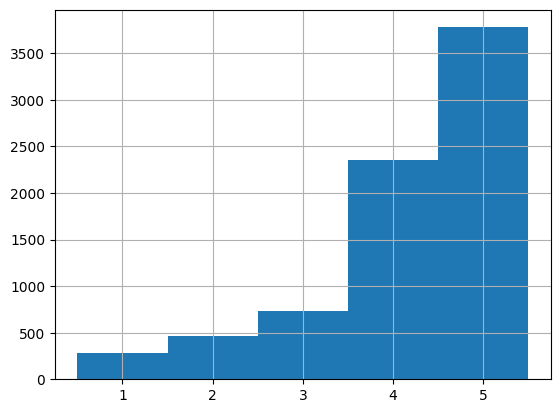

In [50]:
# most coffee shops get 4 or 5 star ratings.
bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
df['stars'].hist(bins=bin_edges);

##2.2 Split into two dataframes based on star rating
good: ratings 4 and 5 <br>
bad: ratings <4

In [51]:
# Complete code here
good = df[df['stars'] >= 4]
bad = df[df['stars'] < 4]

print("Good Ratings:")
print(good)

print("\nBad Ratings:")
print(bad)

Good Ratings:
                     coffee_shop_name  \
0     The Factory - Cafe With a Soul    
1     The Factory - Cafe With a Soul    
2     The Factory - Cafe With a Soul    
4     The Factory - Cafe With a Soul    
5     The Factory - Cafe With a Soul    
...                               ...   
7610               The Steeping Room    
7611               The Steeping Room    
7612               The Steeping Room    
7613               The Steeping Room    
7615               The Steeping Room    

                                       full_review_text        star_rating  \
0      11/25/2016 1 check-in Love love loved the atm...   5.0 star rating    
1      12/2/2016 Listed in Date Night: Austin, Ambia...   4.0 star rating    
2      11/30/2016 1 check-in Listed in Brunch Spots ...   4.0 star rating    
4      12/3/2016 1 check-in They are located within ...   4.0 star rating    
5      11/20/2016 1 check-in Very cute cafe! I think...   4.0 star rating    
...                      

In [52]:
# make sure that all reviews are accounted for in one of the two groups
assert df.shape[0] == good.shape[0] + bad.shape[0]

#### Summary of the descriptive token statistics 

`word` The specific token that is being analyzed

`appears_in_docs` Number of documents that the word/token appears in

`count` The total number of appearances of that token within the corpus 

`rank` Ranking of tokens by count 

`fraction_of_total` Fraction of the total tokens that this token makes up

`cumulative_fraction_of_total` Sum of fractional total of ranked tokens, down to and including this token. 

`appears_in_fraction_of_docs` Fraction of documents that token appears in 

In [53]:
good_wc = count(good["spacy_tokens"])
good_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
39,coffee,3878,7914,1.0,0.027396,0.027396,0.631596
69,place,3115,4783,2.0,0.016558,0.043954,0.507329
192,good,2887,4263,3.0,0.014757,0.058711,0.470195
85,great,2493,3446,4.0,0.011929,0.070641,0.406026
18,check,2686,2939,5.0,0.010174,0.080815,0.437459
200,like,1678,2435,6.0,0.008429,0.089244,0.273290
9,love,1540,1997,7.0,0.006913,0.096157,0.250814
407,come,1482,1990,8.0,0.006889,0.103046,0.241368
43,Austin,1544,1988,9.0,0.006882,0.109928,0.251466
26,1,1722,1805,10.0,0.006248,0.116176,0.280456


In [54]:
bad_wc = count(bad["spacy_tokens"])
bad_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
37,coffee,910,2073,1.0,0.025686,0.025686,0.616531
6,place,751,1223,2.0,0.015154,0.040841,0.508808
8,good,638,985,3.0,0.012205,0.053046,0.432249
18,like,596,945,4.0,0.011709,0.064755,0.403794
186,order,431,760,5.0,0.009417,0.074172,0.292005
96,come,454,655,6.0,0.008116,0.082288,0.307588
0,drink,362,610,7.0,0.007558,0.089847,0.245257
488,time,418,606,8.0,0.007509,0.097356,0.283198
149,check,489,527,9.0,0.006530,0.103886,0.331301
153,food,321,503,10.0,0.006233,0.110118,0.217480


##2.3 Visualize top 20 `good` and top 20 `bad` tokens using a word cloud

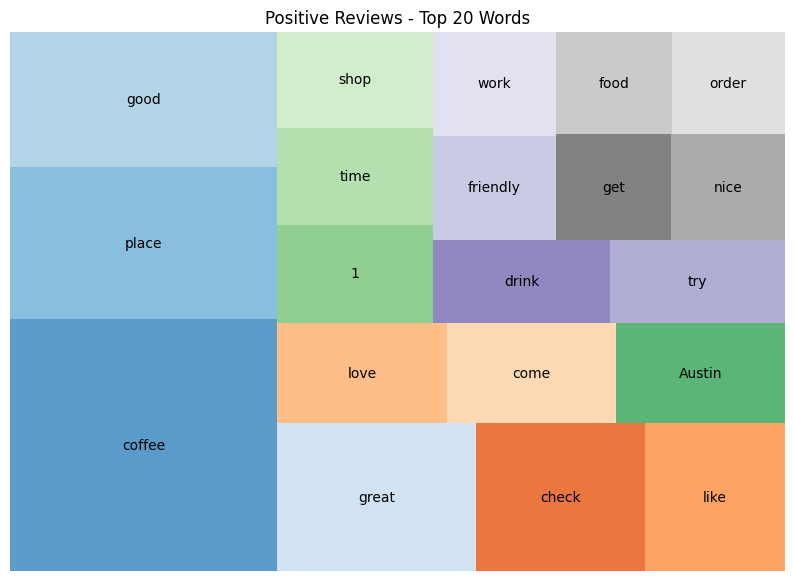

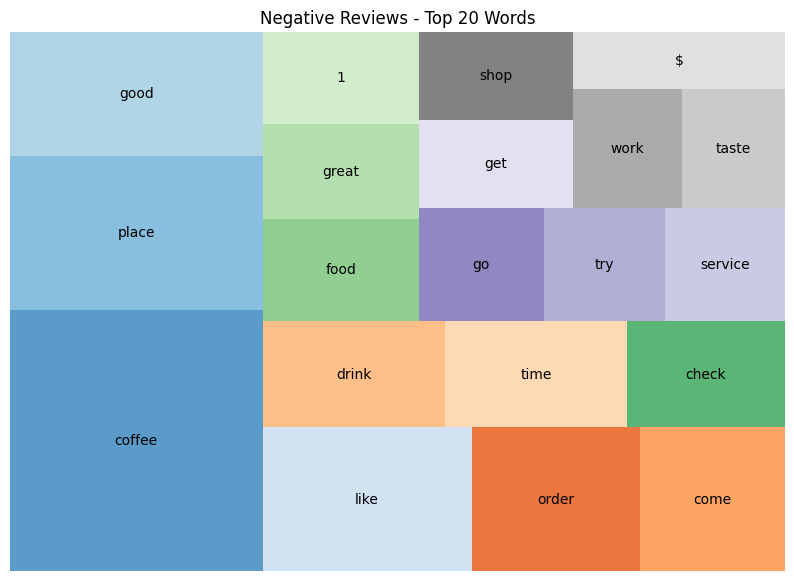

In [55]:
# COMPLETE CODE HERE

colors = plt.cm.tab20c.colors

good_top20 = good_wc[good_wc['rank'] <= 20]
plt.figure(figsize=(10, 7))
squarify.plot(sizes=good_top20['count'], label=good_top20['word'], alpha=0.8, color=colors)
plt.title("Positive Reviews - Top 20 Words")
plt.axis('off')
plt.show()

# Example top 20 words for negative reviews
bad_top20 = bad_wc[bad_wc['rank'] <= 20]

plt.figure(figsize=(10, 7))
squarify.plot(sizes=bad_top20['count'], label=bad_top20['word'], alpha=0.8, color=colors)
plt.title("Negative Reviews - Top 20 Words")
plt.axis('off')
plt.show()


## 3. Find out which words are likely to occur in "good" and "bad" reviews
Ok - let's do a more thorough analysis! <br>
Looking at `df_pos_wc` and `df_neg_wc` we notice that certain words are ranked higher in one data set and lower in the other. 

In [61]:
# these are words that are ranked high in one data set but not the other
# you might try working with two keyword lists -- one for the good reviews and one for the bad reviews 
key_words = ['coffee', 'place', 'good', 'great', 'check','bad', 'wait', 'service', 'rude', 'slow']

In [62]:
good_wc.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
39,coffee,3878,7914,1.0,0.027396,0.027396,0.631596
69,place,3115,4783,2.0,0.016558,0.043954,0.507329
192,good,2887,4263,3.0,0.014757,0.058711,0.470195
85,great,2493,3446,4.0,0.011929,0.070641,0.406026
18,check,2686,2939,5.0,0.010174,0.080815,0.437459


In [63]:
df_pos_keywords_mask = good_wc.word.isin(key_words)
df_pos_keywords = good_wc[df_pos_keywords_mask]
df_pos_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
39,coffee,3878,7914,1.0,0.027396,0.027396,0.631596
69,place,3115,4783,2.0,0.016558,0.043954,0.507329
192,good,2887,4263,3.0,0.014757,0.058711,0.470195
85,great,2493,3446,4.0,0.011929,0.070641,0.406026
18,check,2686,2939,5.0,0.010174,0.080815,0.437459


In [64]:
df_neg_keywords_mask = bad_wc.word.isin(key_words)
df_neg_keywords = bad_wc[df_neg_keywords_mask]
df_neg_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
37,coffee,910,2073,1.0,0.025686,0.025686,0.616531
6,place,751,1223,2.0,0.015154,0.040841,0.508808
8,good,638,985,3.0,0.012205,0.053046,0.432249
149,check,489,527,9.0,0.006530,0.103886,0.331301
65,great,345,467,11.0,0.005787,0.115905,0.233740


C:\Users\ISHMO_CT\AppData\Local\Temp\ipykernel_17476\3189277695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=key_words);


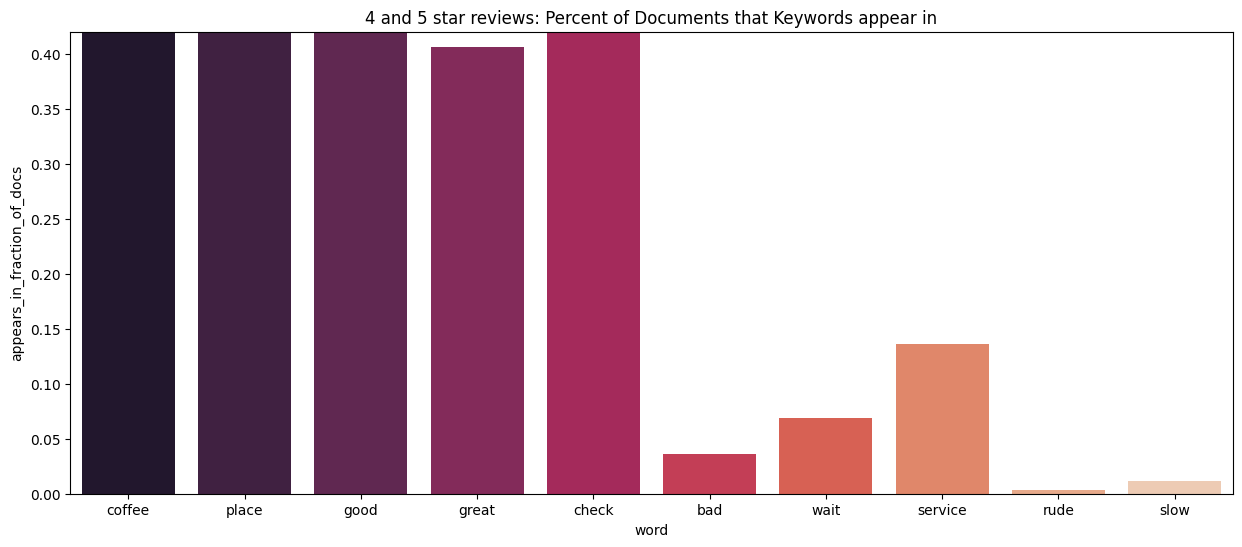

C:\Users\ISHMO_CT\AppData\Local\Temp\ipykernel_17476\3189277695.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=key_words);


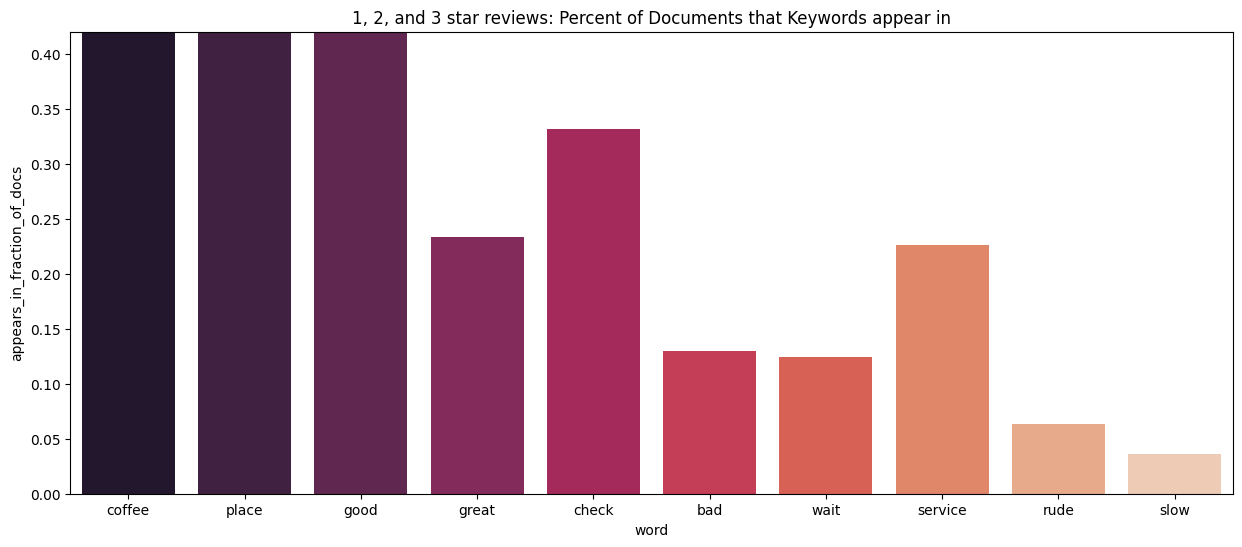

In [65]:
import seaborn as sns

plt.figure(figsize=(15,6))
plt.title("4 and 5 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=key_words);
plt.ylim(0,.42)
plt.show();

plt.figure(figsize=(15,6))
plt.title("1, 2, and 3 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=key_words);
plt.ylim(0,.42)
plt.show();